In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
# from skimage import measure
import pyvista as pv
pv.set_jupyter_backend('trame')
from tqdm import tqdm, trange
from scipy import interpolate, ndimage
from scipy.interpolate import splrep, splev
from scipy.io import savemat, loadmat
from time import time
from PIL import Image

In [2]:
# random seed
# np.random.seed(1145142)

## Define function

In [3]:
from Vortex import *

In [4]:
def generate_rho_phase(r_grid,sigma_k,kappa,alpha):
    #### Wave vector distribution ####
    scale = 3.6
    k_mean_z = np.array([0,0,scale])*2*np.pi # lamellar perpendicular to z axis 
    # k_mean_x = np.array([0,0,0])*np.pi # lamellar perpendicular to z axis 
    k_var  = (np.array([0,0,sigma_k*scale])*2*np.pi)**2
    k_cov  = np.diagflat(k_var)

    rho = sample_wave_MO_complex(r_grid,k_mean_z,k_cov,n_wave = 100, kappa=kappa)

    n_grid_scale = 360
    scale_zoom = n_grid_scale/rho.shape[0]

    def scale_rho(rho, r_grid, scale):
        rho = ndimage.zoom(rho, scale, order=1)
        r_grid = np.array([ndimage.zoom(r, scale, order=1) for r in r_grid]) 
        return rho, r_grid

    rho, r_grid = scale_rho(rho, r_grid, scale_zoom)

    # rho_real = rho.real
    # rho_imag = rho.imag
    rho_phase = np.angle(rho)

    return rho_phase

In [5]:
## Meshgrid
n_grid = 144
x = np.linspace(-1,1,n_grid+1)
y = np.linspace(-1,1,n_grid+1)
z = np.linspace(-1,1,n_grid+1)

r_grid = np.meshgrid(x,y,z) 

sigma_k_list = [0, 0.1, 0.2]
kappa_list = [256, 16, 1]

parameters_list = []
tangent_list_parameters = []
for sigma_k in sigma_k_list:
    for kappa in kappa_list:
        ## Random wave
        # sigma_k = 0.025
        # kappa = 1
        alpha = 0

        parameters = [sigma_k,kappa,alpha]
        parameters_list.append(parameters)

        print('\nparameters = [{:0.1f}, {:0>3d}, {:0.2f}]'.format(*parameters))

        sample_size = 0
        tangent_list = []
        minsize = 20000
        while sample_size < minsize:
            # generate random wave phase
            rho_phase = generate_rho_phase(r_grid,sigma_k,kappa,alpha)
            # identify vortex voxel
            vortex_volume = vortex_phase(rho_phase)
            if np.sum(vortex_volume) == 0:
                print('no defect identified')
                print('sample_size = {}/{} (+ 0)\n'.format(sample_size,minsize))
                continue
            # generate adjacent list
            positions_tuple_list, positions_list, adjacent_list, adjacent_id_list = get_adjacency(vortex_volume)
            poslist_arr = np.array(positions_tuple_list)
            # generate sample points
            sample, sample_adj_list, sample_adj_dict = get_core(positions_tuple_list, adjacent_id_list, 
                                                    cluster_size=3)
            # reorder sample points, trace vortex line
            sample_ordered = get_ordered_points(sample, sample_adj_list)

            sample_size_current = np.sum([len(x) for x in sample_ordered])
            sample_size += sample_size_current

            print('sample_size = {}/{} (+ {})\n'.format(sample_size,minsize, sample_size_current))

            # get line tangent
            for line in sample_ordered:
                if len(line)>=7:
                    # smooth the line
                    x = np.arange(len(line))
                    arr_line = np.array(line)
                    spl_list = [splrep(x,arr_line[:,i],w=np.ones(len(line)),s=len(line)) for i in range(3)]
                    line_sm = np.array([splev(x,spl) for spl in spl_list]).T

                    tangent = get_tangent(line_sm)
                    tangent_list.extend(tangent[3:-3])

        tangent_list_parameters.append(tangent_list)



parameters = [0.0, 256, 0.00]


100%|██████████| 360/360 [00:03<00:00, 117.13it/s]


no defect identified
sample_size = 0/20000 (+ 0)



100%|██████████| 360/360 [00:03<00:00, 113.63it/s]


no defect identified
sample_size = 0/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 122.93it/s]


sample_size = 121/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 120.42it/s]


sample_size = 361/20000 (+ 240)



100%|██████████| 360/360 [00:02<00:00, 123.10it/s]


no defect identified
sample_size = 361/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 124.73it/s]


sample_size = 605/20000 (+ 244)



100%|██████████| 360/360 [00:02<00:00, 124.32it/s]


sample_size = 727/20000 (+ 122)



100%|██████████| 360/360 [00:02<00:00, 122.64it/s]


no defect identified
sample_size = 727/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 126.02it/s]


sample_size = 848/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 125.56it/s]


sample_size = 969/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 123.24it/s]


sample_size = 1090/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 123.88it/s]


sample_size = 1332/20000 (+ 242)



100%|██████████| 360/360 [00:02<00:00, 122.54it/s]


sample_size = 1573/20000 (+ 241)



100%|██████████| 360/360 [00:02<00:00, 120.98it/s]


sample_size = 1589/20000 (+ 16)



100%|██████████| 360/360 [00:02<00:00, 124.81it/s]


no defect identified
sample_size = 1589/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 125.85it/s]


sample_size = 1709/20000 (+ 120)



100%|██████████| 360/360 [00:02<00:00, 126.04it/s]


no defect identified
sample_size = 1709/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 122.55it/s]


sample_size = 1829/20000 (+ 120)



100%|██████████| 360/360 [00:02<00:00, 124.43it/s]


sample_size = 2178/20000 (+ 349)



100%|██████████| 360/360 [00:02<00:00, 126.17it/s]


no defect identified
sample_size = 2178/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 127.02it/s]


sample_size = 2299/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 123.06it/s]


sample_size = 2496/20000 (+ 197)



100%|██████████| 360/360 [00:02<00:00, 122.59it/s]


sample_size = 3104/20000 (+ 608)



100%|██████████| 360/360 [00:02<00:00, 121.76it/s]


sample_size = 3224/20000 (+ 120)



100%|██████████| 360/360 [00:02<00:00, 122.28it/s]


no defect identified
sample_size = 3224/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 127.99it/s]


sample_size = 3344/20000 (+ 120)



100%|██████████| 360/360 [00:03<00:00, 116.32it/s]


sample_size = 3465/20000 (+ 121)



100%|██████████| 360/360 [00:03<00:00, 117.23it/s]


no defect identified
sample_size = 3465/20000 (+ 0)



100%|██████████| 360/360 [00:03<00:00, 119.16it/s]


sample_size = 3784/20000 (+ 319)



100%|██████████| 360/360 [00:03<00:00, 119.37it/s]


sample_size = 3951/20000 (+ 167)



100%|██████████| 360/360 [00:03<00:00, 95.88it/s] 


sample_size = 4190/20000 (+ 239)



100%|██████████| 360/360 [00:02<00:00, 129.16it/s]


sample_size = 4434/20000 (+ 244)



100%|██████████| 360/360 [00:02<00:00, 124.55it/s]


sample_size = 4555/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 125.78it/s]


no defect identified
sample_size = 4555/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 120.32it/s]


sample_size = 4737/20000 (+ 182)



100%|██████████| 360/360 [00:02<00:00, 121.40it/s]


sample_size = 4826/20000 (+ 89)



100%|██████████| 360/360 [00:03<00:00, 117.38it/s]


no defect identified
sample_size = 4826/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 121.96it/s]


sample_size = 5022/20000 (+ 196)



100%|██████████| 360/360 [00:02<00:00, 125.41it/s]


sample_size = 5348/20000 (+ 326)



100%|██████████| 360/360 [00:02<00:00, 127.70it/s]


no defect identified
sample_size = 5348/20000 (+ 0)



100%|██████████| 360/360 [00:03<00:00, 116.58it/s]


sample_size = 5482/20000 (+ 134)



100%|██████████| 360/360 [00:03<00:00, 115.42it/s]


no defect identified
sample_size = 5482/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 130.30it/s]


sample_size = 5602/20000 (+ 120)



100%|██████████| 360/360 [00:03<00:00, 119.97it/s]


sample_size = 5957/20000 (+ 355)



100%|██████████| 360/360 [00:02<00:00, 121.38it/s]


no defect identified
sample_size = 5957/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 124.96it/s]


no defect identified
sample_size = 5957/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 124.23it/s]


sample_size = 6318/20000 (+ 361)



100%|██████████| 360/360 [00:02<00:00, 126.41it/s]


sample_size = 6423/20000 (+ 105)



100%|██████████| 360/360 [00:02<00:00, 121.99it/s]


sample_size = 6664/20000 (+ 241)



100%|██████████| 360/360 [00:02<00:00, 123.75it/s]


sample_size = 6708/20000 (+ 44)



100%|██████████| 360/360 [00:03<00:00, 117.73it/s]


no defect identified
sample_size = 6708/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 123.07it/s]


sample_size = 6933/20000 (+ 225)



100%|██████████| 360/360 [00:02<00:00, 122.21it/s]


sample_size = 7179/20000 (+ 246)



100%|██████████| 360/360 [00:03<00:00, 119.79it/s]


sample_size = 7403/20000 (+ 224)



100%|██████████| 360/360 [00:02<00:00, 125.43it/s]


no defect identified
sample_size = 7403/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 124.78it/s]


no defect identified
sample_size = 7403/20000 (+ 0)



100%|██████████| 360/360 [00:03<00:00, 118.61it/s]


no defect identified
sample_size = 7403/20000 (+ 0)



100%|██████████| 360/360 [00:03<00:00, 112.42it/s]


no defect identified
sample_size = 7403/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 121.35it/s]


no defect identified
sample_size = 7403/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 124.39it/s]


sample_size = 7524/20000 (+ 121)



100%|██████████| 360/360 [00:03<00:00, 119.02it/s]


no defect identified
sample_size = 7524/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 131.32it/s]


sample_size = 7765/20000 (+ 241)



100%|██████████| 360/360 [00:02<00:00, 122.52it/s]


sample_size = 8016/20000 (+ 251)



100%|██████████| 360/360 [00:02<00:00, 126.46it/s]


sample_size = 8197/20000 (+ 181)



100%|██████████| 360/360 [00:02<00:00, 123.78it/s]


sample_size = 8320/20000 (+ 123)



100%|██████████| 360/360 [00:02<00:00, 122.51it/s]


no defect identified
sample_size = 8320/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 121.78it/s]


sample_size = 8562/20000 (+ 242)



100%|██████████| 360/360 [00:02<00:00, 122.87it/s]


sample_size = 8683/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 123.73it/s]


sample_size = 8856/20000 (+ 173)



100%|██████████| 360/360 [00:02<00:00, 124.84it/s]


sample_size = 8977/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 124.55it/s]


sample_size = 9220/20000 (+ 243)



100%|██████████| 360/360 [00:02<00:00, 125.97it/s]


sample_size = 9341/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 126.27it/s]


sample_size = 9506/20000 (+ 165)



100%|██████████| 360/360 [00:02<00:00, 125.30it/s]


sample_size = 9711/20000 (+ 205)



100%|██████████| 360/360 [00:02<00:00, 125.36it/s]


sample_size = 9953/20000 (+ 242)



100%|██████████| 360/360 [00:02<00:00, 127.72it/s]


sample_size = 9964/20000 (+ 11)



100%|██████████| 360/360 [00:02<00:00, 128.11it/s]


sample_size = 10085/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 122.56it/s]


sample_size = 10165/20000 (+ 80)



100%|██████████| 360/360 [00:03<00:00, 108.55it/s]


sample_size = 10286/20000 (+ 121)



100%|██████████| 360/360 [00:03<00:00, 110.23it/s]


sample_size = 10531/20000 (+ 245)



100%|██████████| 360/360 [00:03<00:00, 108.88it/s]


no defect identified
sample_size = 10531/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 124.41it/s]


sample_size = 10854/20000 (+ 323)



100%|██████████| 360/360 [00:02<00:00, 125.30it/s]


sample_size = 10975/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 121.23it/s]


no defect identified
sample_size = 10975/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 125.44it/s]


no defect identified
sample_size = 10975/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 122.69it/s]


sample_size = 11251/20000 (+ 276)



100%|██████████| 360/360 [00:02<00:00, 128.69it/s]


sample_size = 11733/20000 (+ 482)



100%|██████████| 360/360 [00:02<00:00, 128.05it/s]


sample_size = 11977/20000 (+ 244)



100%|██████████| 360/360 [00:02<00:00, 128.38it/s]


no defect identified
sample_size = 11977/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 126.75it/s]


no defect identified
sample_size = 11977/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 128.85it/s]


sample_size = 12337/20000 (+ 360)



100%|██████████| 360/360 [00:02<00:00, 130.01it/s]


sample_size = 12578/20000 (+ 241)



100%|██████████| 360/360 [00:02<00:00, 130.29it/s]


no defect identified
sample_size = 12578/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 130.94it/s]


sample_size = 12871/20000 (+ 293)



100%|██████████| 360/360 [00:02<00:00, 131.02it/s]


sample_size = 13025/20000 (+ 154)



100%|██████████| 360/360 [00:02<00:00, 131.81it/s]


sample_size = 13265/20000 (+ 240)



100%|██████████| 360/360 [00:02<00:00, 131.90it/s]


no defect identified
sample_size = 13265/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 132.59it/s]


no defect identified
sample_size = 13265/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 131.81it/s]


no defect identified
sample_size = 13265/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 132.48it/s]


sample_size = 13507/20000 (+ 242)



100%|██████████| 360/360 [00:02<00:00, 133.26it/s]


no defect identified
sample_size = 13507/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 131.38it/s]


sample_size = 13871/20000 (+ 364)



100%|██████████| 360/360 [00:02<00:00, 131.76it/s]


sample_size = 14112/20000 (+ 241)



100%|██████████| 360/360 [00:02<00:00, 131.03it/s]


sample_size = 14235/20000 (+ 123)



100%|██████████| 360/360 [00:02<00:00, 131.79it/s]


sample_size = 14478/20000 (+ 243)



100%|██████████| 360/360 [00:02<00:00, 131.05it/s]


sample_size = 14720/20000 (+ 242)



100%|██████████| 360/360 [00:02<00:00, 131.63it/s]


sample_size = 14963/20000 (+ 243)



100%|██████████| 360/360 [00:02<00:00, 129.84it/s]


sample_size = 15229/20000 (+ 266)



100%|██████████| 360/360 [00:02<00:00, 129.25it/s]


sample_size = 15471/20000 (+ 242)



100%|██████████| 360/360 [00:02<00:00, 130.26it/s]


sample_size = 15488/20000 (+ 17)



100%|██████████| 360/360 [00:02<00:00, 132.23it/s]


no defect identified
sample_size = 15488/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 128.50it/s]


sample_size = 15797/20000 (+ 309)



100%|██████████| 360/360 [00:02<00:00, 130.53it/s]


sample_size = 16160/20000 (+ 363)



100%|██████████| 360/360 [00:02<00:00, 128.81it/s]


sample_size = 16166/20000 (+ 6)



100%|██████████| 360/360 [00:02<00:00, 126.52it/s]


sample_size = 16408/20000 (+ 242)



100%|██████████| 360/360 [00:02<00:00, 131.81it/s]


sample_size = 16894/20000 (+ 486)



100%|██████████| 360/360 [00:02<00:00, 131.96it/s]


sample_size = 17017/20000 (+ 123)



100%|██████████| 360/360 [00:02<00:00, 129.08it/s]


sample_size = 17064/20000 (+ 47)



100%|██████████| 360/360 [00:02<00:00, 130.87it/s]


sample_size = 17198/20000 (+ 134)



100%|██████████| 360/360 [00:02<00:00, 131.29it/s]


no defect identified
sample_size = 17198/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 130.80it/s]


no defect identified
sample_size = 17198/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 131.67it/s]


sample_size = 17356/20000 (+ 158)



100%|██████████| 360/360 [00:02<00:00, 131.61it/s]


sample_size = 17585/20000 (+ 229)



100%|██████████| 360/360 [00:02<00:00, 130.47it/s]


sample_size = 17712/20000 (+ 127)



100%|██████████| 360/360 [00:02<00:00, 132.89it/s]


sample_size = 17874/20000 (+ 162)



100%|██████████| 360/360 [00:02<00:00, 130.50it/s]


no defect identified
sample_size = 17874/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 132.47it/s]


sample_size = 17994/20000 (+ 120)



100%|██████████| 360/360 [00:02<00:00, 132.45it/s]


sample_size = 18114/20000 (+ 120)



100%|██████████| 360/360 [00:02<00:00, 128.64it/s]


no defect identified
sample_size = 18114/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 130.39it/s]


no defect identified
sample_size = 18114/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 131.09it/s]


sample_size = 18336/20000 (+ 222)



100%|██████████| 360/360 [00:02<00:00, 131.50it/s]


sample_size = 18457/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 130.72it/s]


sample_size = 18578/20000 (+ 121)



100%|██████████| 360/360 [00:02<00:00, 131.26it/s]


no defect identified
sample_size = 18578/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 131.66it/s]


sample_size = 18595/20000 (+ 17)



100%|██████████| 360/360 [00:02<00:00, 131.47it/s]


sample_size = 18751/20000 (+ 156)



100%|██████████| 360/360 [00:02<00:00, 132.18it/s]


sample_size = 18805/20000 (+ 54)



100%|██████████| 360/360 [00:02<00:00, 131.23it/s]


no defect identified
sample_size = 18805/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 131.17it/s]


no defect identified
sample_size = 18805/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 131.02it/s]


sample_size = 19046/20000 (+ 241)



100%|██████████| 360/360 [00:02<00:00, 133.10it/s]


no defect identified
sample_size = 19046/20000 (+ 0)



100%|██████████| 360/360 [00:02<00:00, 130.03it/s]


sample_size = 19416/20000 (+ 370)



100%|██████████| 360/360 [00:02<00:00, 129.73it/s]


sample_size = 19625/20000 (+ 209)



100%|██████████| 360/360 [00:02<00:00, 130.60it/s]


sample_size = 19745/20000 (+ 120)



100%|██████████| 360/360 [00:02<00:00, 131.75it/s]


sample_size = 19908/20000 (+ 163)



100%|██████████| 360/360 [00:02<00:00, 130.60it/s]


sample_size = 20273/20000 (+ 365)


parameters = [0.0, 016, 0.00]


100%|██████████| 360/360 [00:02<00:00, 129.85it/s]


sample_size = 2106/20000 (+ 2106)



100%|██████████| 360/360 [00:02<00:00, 131.16it/s]


sample_size = 4942/20000 (+ 2836)



100%|██████████| 360/360 [00:02<00:00, 131.87it/s]


sample_size = 8283/20000 (+ 3341)



100%|██████████| 360/360 [00:02<00:00, 128.65it/s]


sample_size = 10389/20000 (+ 2106)



100%|██████████| 360/360 [00:02<00:00, 129.61it/s]


sample_size = 12696/20000 (+ 2307)



100%|██████████| 360/360 [00:02<00:00, 129.96it/s]


sample_size = 15812/20000 (+ 3116)



100%|██████████| 360/360 [00:02<00:00, 131.31it/s]


sample_size = 18503/20000 (+ 2691)



100%|██████████| 360/360 [00:02<00:00, 130.09it/s]


sample_size = 20566/20000 (+ 2063)


parameters = [0.0, 001, 0.00]


100%|██████████| 360/360 [00:02<00:00, 128.07it/s]


sample_size = 23482/20000 (+ 23482)


parameters = [0.1, 256, 0.00]


100%|██████████| 360/360 [00:02<00:00, 131.12it/s]


sample_size = 163/20000 (+ 163)



100%|██████████| 360/360 [00:02<00:00, 130.59it/s]


sample_size = 518/20000 (+ 355)



100%|██████████| 360/360 [00:02<00:00, 130.83it/s]


sample_size = 861/20000 (+ 343)



100%|██████████| 360/360 [00:02<00:00, 127.74it/s]


sample_size = 1143/20000 (+ 282)



100%|██████████| 360/360 [00:02<00:00, 130.56it/s]


sample_size = 1737/20000 (+ 594)



100%|██████████| 360/360 [00:02<00:00, 130.10it/s]


sample_size = 2143/20000 (+ 406)



100%|██████████| 360/360 [00:02<00:00, 130.15it/s]


sample_size = 2756/20000 (+ 613)



100%|██████████| 360/360 [00:02<00:00, 124.85it/s]


sample_size = 3094/20000 (+ 338)



100%|██████████| 360/360 [00:02<00:00, 126.33it/s]


sample_size = 3624/20000 (+ 530)



100%|██████████| 360/360 [00:02<00:00, 127.84it/s]


sample_size = 4155/20000 (+ 531)



100%|██████████| 360/360 [00:02<00:00, 128.78it/s]


sample_size = 4700/20000 (+ 545)



100%|██████████| 360/360 [00:02<00:00, 130.46it/s]


sample_size = 5204/20000 (+ 504)



100%|██████████| 360/360 [00:02<00:00, 126.73it/s]


sample_size = 5705/20000 (+ 501)



100%|██████████| 360/360 [00:02<00:00, 130.18it/s]


sample_size = 6346/20000 (+ 641)



100%|██████████| 360/360 [00:02<00:00, 130.17it/s]


sample_size = 6967/20000 (+ 621)



100%|██████████| 360/360 [00:02<00:00, 129.99it/s]


sample_size = 7396/20000 (+ 429)



100%|██████████| 360/360 [00:02<00:00, 130.96it/s]


sample_size = 7909/20000 (+ 513)



100%|██████████| 360/360 [00:02<00:00, 130.66it/s]


sample_size = 8089/20000 (+ 180)



100%|██████████| 360/360 [00:02<00:00, 128.48it/s]


sample_size = 8707/20000 (+ 618)



100%|██████████| 360/360 [00:02<00:00, 129.39it/s]


sample_size = 9222/20000 (+ 515)



100%|██████████| 360/360 [00:02<00:00, 130.25it/s]


sample_size = 9767/20000 (+ 545)



100%|██████████| 360/360 [00:02<00:00, 130.36it/s]


sample_size = 10039/20000 (+ 272)



100%|██████████| 360/360 [00:02<00:00, 131.36it/s]


sample_size = 10363/20000 (+ 324)



100%|██████████| 360/360 [00:02<00:00, 131.39it/s]


sample_size = 10806/20000 (+ 443)



100%|██████████| 360/360 [00:02<00:00, 130.49it/s]


sample_size = 11284/20000 (+ 478)



100%|██████████| 360/360 [00:02<00:00, 130.16it/s]


sample_size = 11929/20000 (+ 645)



100%|██████████| 360/360 [00:02<00:00, 131.22it/s]


sample_size = 12403/20000 (+ 474)



100%|██████████| 360/360 [00:02<00:00, 130.67it/s]


sample_size = 13022/20000 (+ 619)



100%|██████████| 360/360 [00:02<00:00, 130.19it/s]


sample_size = 13441/20000 (+ 419)



100%|██████████| 360/360 [00:02<00:00, 128.57it/s]


sample_size = 13885/20000 (+ 444)



100%|██████████| 360/360 [00:02<00:00, 130.14it/s]


sample_size = 14437/20000 (+ 552)



100%|██████████| 360/360 [00:02<00:00, 129.36it/s]


sample_size = 14651/20000 (+ 214)



100%|██████████| 360/360 [00:02<00:00, 129.25it/s]


sample_size = 15114/20000 (+ 463)



100%|██████████| 360/360 [00:02<00:00, 130.93it/s]


sample_size = 15698/20000 (+ 584)



100%|██████████| 360/360 [00:02<00:00, 131.45it/s]


sample_size = 16169/20000 (+ 471)



100%|██████████| 360/360 [00:02<00:00, 131.00it/s]


sample_size = 16430/20000 (+ 261)



100%|██████████| 360/360 [00:02<00:00, 131.16it/s]


sample_size = 16811/20000 (+ 381)



100%|██████████| 360/360 [00:02<00:00, 129.22it/s]


sample_size = 17297/20000 (+ 486)



100%|██████████| 360/360 [00:02<00:00, 128.38it/s]


sample_size = 17678/20000 (+ 381)



100%|██████████| 360/360 [00:02<00:00, 129.97it/s]


sample_size = 18164/20000 (+ 486)



100%|██████████| 360/360 [00:02<00:00, 126.14it/s]


sample_size = 18635/20000 (+ 471)



100%|██████████| 360/360 [00:02<00:00, 130.92it/s]


sample_size = 18997/20000 (+ 362)



100%|██████████| 360/360 [00:02<00:00, 129.66it/s]


sample_size = 19590/20000 (+ 593)



100%|██████████| 360/360 [00:02<00:00, 130.21it/s]


sample_size = 19651/20000 (+ 61)



100%|██████████| 360/360 [00:02<00:00, 131.15it/s]


sample_size = 20137/20000 (+ 486)


parameters = [0.1, 016, 0.00]


100%|██████████| 360/360 [00:02<00:00, 129.59it/s]


sample_size = 3445/20000 (+ 3445)



100%|██████████| 360/360 [00:02<00:00, 131.10it/s]


sample_size = 6754/20000 (+ 3309)



100%|██████████| 360/360 [00:02<00:00, 129.94it/s]


sample_size = 9736/20000 (+ 2982)



100%|██████████| 360/360 [00:02<00:00, 126.44it/s]


sample_size = 12909/20000 (+ 3173)



100%|██████████| 360/360 [00:02<00:00, 127.79it/s]


sample_size = 15890/20000 (+ 2981)



100%|██████████| 360/360 [00:02<00:00, 126.72it/s]


sample_size = 18568/20000 (+ 2678)



100%|██████████| 360/360 [00:02<00:00, 128.46it/s]


sample_size = 21345/20000 (+ 2777)


parameters = [0.1, 001, 0.00]


100%|██████████| 360/360 [00:02<00:00, 129.17it/s]


sample_size = 24559/20000 (+ 24559)


parameters = [0.2, 256, 0.00]


100%|██████████| 360/360 [00:02<00:00, 127.19it/s]


sample_size = 1176/20000 (+ 1176)



100%|██████████| 360/360 [00:02<00:00, 125.25it/s]


sample_size = 2197/20000 (+ 1021)



100%|██████████| 360/360 [00:02<00:00, 127.45it/s]


sample_size = 2930/20000 (+ 733)



100%|██████████| 360/360 [00:02<00:00, 124.22it/s]


sample_size = 3428/20000 (+ 498)



100%|██████████| 360/360 [00:02<00:00, 129.81it/s]


sample_size = 4009/20000 (+ 581)



100%|██████████| 360/360 [00:02<00:00, 125.47it/s]


sample_size = 4914/20000 (+ 905)



100%|██████████| 360/360 [00:02<00:00, 125.69it/s]


sample_size = 5949/20000 (+ 1035)



100%|██████████| 360/360 [00:02<00:00, 128.65it/s]


sample_size = 6719/20000 (+ 770)



100%|██████████| 360/360 [00:02<00:00, 128.06it/s]


sample_size = 7628/20000 (+ 909)



100%|██████████| 360/360 [00:02<00:00, 129.37it/s]


sample_size = 8253/20000 (+ 625)



100%|██████████| 360/360 [00:02<00:00, 125.83it/s]


sample_size = 9235/20000 (+ 982)



100%|██████████| 360/360 [00:02<00:00, 126.14it/s]


sample_size = 9865/20000 (+ 630)



100%|██████████| 360/360 [00:02<00:00, 130.03it/s]


sample_size = 10525/20000 (+ 660)



100%|██████████| 360/360 [00:02<00:00, 125.12it/s]


sample_size = 11257/20000 (+ 732)



100%|██████████| 360/360 [00:02<00:00, 128.44it/s]


sample_size = 12009/20000 (+ 752)



100%|██████████| 360/360 [00:02<00:00, 127.12it/s]


sample_size = 13137/20000 (+ 1128)



100%|██████████| 360/360 [00:02<00:00, 127.54it/s]


sample_size = 14043/20000 (+ 906)



100%|██████████| 360/360 [00:02<00:00, 129.54it/s]


sample_size = 15313/20000 (+ 1270)



100%|██████████| 360/360 [00:02<00:00, 128.14it/s]


sample_size = 16072/20000 (+ 759)



100%|██████████| 360/360 [00:02<00:00, 127.54it/s]


sample_size = 16761/20000 (+ 689)



100%|██████████| 360/360 [00:02<00:00, 129.79it/s]


sample_size = 17465/20000 (+ 704)



100%|██████████| 360/360 [00:02<00:00, 126.62it/s]


sample_size = 18333/20000 (+ 868)



100%|██████████| 360/360 [00:02<00:00, 129.58it/s]


sample_size = 19134/20000 (+ 801)



100%|██████████| 360/360 [00:02<00:00, 130.38it/s]


sample_size = 20233/20000 (+ 1099)


parameters = [0.2, 016, 0.00]


100%|██████████| 360/360 [00:02<00:00, 127.80it/s]


sample_size = 3438/20000 (+ 3438)



100%|██████████| 360/360 [00:02<00:00, 126.51it/s]


sample_size = 7889/20000 (+ 4451)



100%|██████████| 360/360 [00:02<00:00, 128.37it/s]


sample_size = 12654/20000 (+ 4765)



100%|██████████| 360/360 [00:02<00:00, 122.37it/s]


sample_size = 16748/20000 (+ 4094)



100%|██████████| 360/360 [00:02<00:00, 128.59it/s]


sample_size = 20687/20000 (+ 3939)


parameters = [0.2, 001, 0.00]


100%|██████████| 360/360 [00:02<00:00, 120.15it/s]


sample_size = 22158/20000 (+ 22158)



In [6]:
# save results to file
i = 0
for j, sigma_k in enumerate(sigma_k_list):
    for k, kappa in enumerate(kappa_list):
        tangent = tangent_list_parameters[i]
        parameters = parameters_list[i]
        i+=1
        phi = [np.arccos(np.abs(t[2])) for t in tangent]

        filename = './mat/line_{:0.3f}_{:0>3d}.mat'.format(sigma_k,kappa)
        print(filename)
        mdic = {'tangent':tangent, 'phi':phi, 'parameters':parameters}
        savemat(filename,mdic)

./mat/line_0.000_256.mat


./mat/line_0.000_016.mat
./mat/line_0.000_001.mat
./mat/line_0.100_256.mat
./mat/line_0.100_016.mat
./mat/line_0.100_001.mat
./mat/line_0.200_256.mat
./mat/line_0.200_016.mat
./mat/line_0.200_001.mat


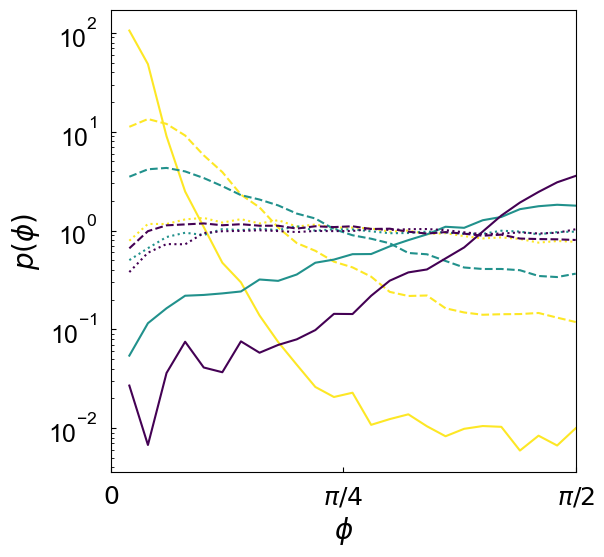

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)

linestyle = ['-','--',':']
linecolor = plt.cm.viridis(1-np.linspace(0, 1, 3))
i = 0
for j, sigma_k in enumerate(sigma_k_list):
    for k, kappa in enumerate(kappa_list):
        i+=1
        filename = './mat/line_{:0.3f}_{:0>3d}.mat'.format(sigma_k,kappa)
        data = loadmat(filename)

        phi = data['phi'][0]

        n_bins = 25
        d_bins = 1/n_bins*np.pi/2
        counts, bins = np.histogram(phi, bins=np.arange(n_bins+1)*d_bins)
        ax.plot(bins[1:],counts/np.sum(counts)/np.sin(bins[1:])/d_bins, color=linecolor[j], linestyle=linestyle[k])

ax.set_yscale('log')
ax.set_xlim([0, np.pi/2])
ax.set_xticks([0, np.pi/4, np.pi/2])
ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$'])

ax.set_xlabel('$\phi$',fontsize=20)
ax.set_ylabel('$p(\phi)$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)

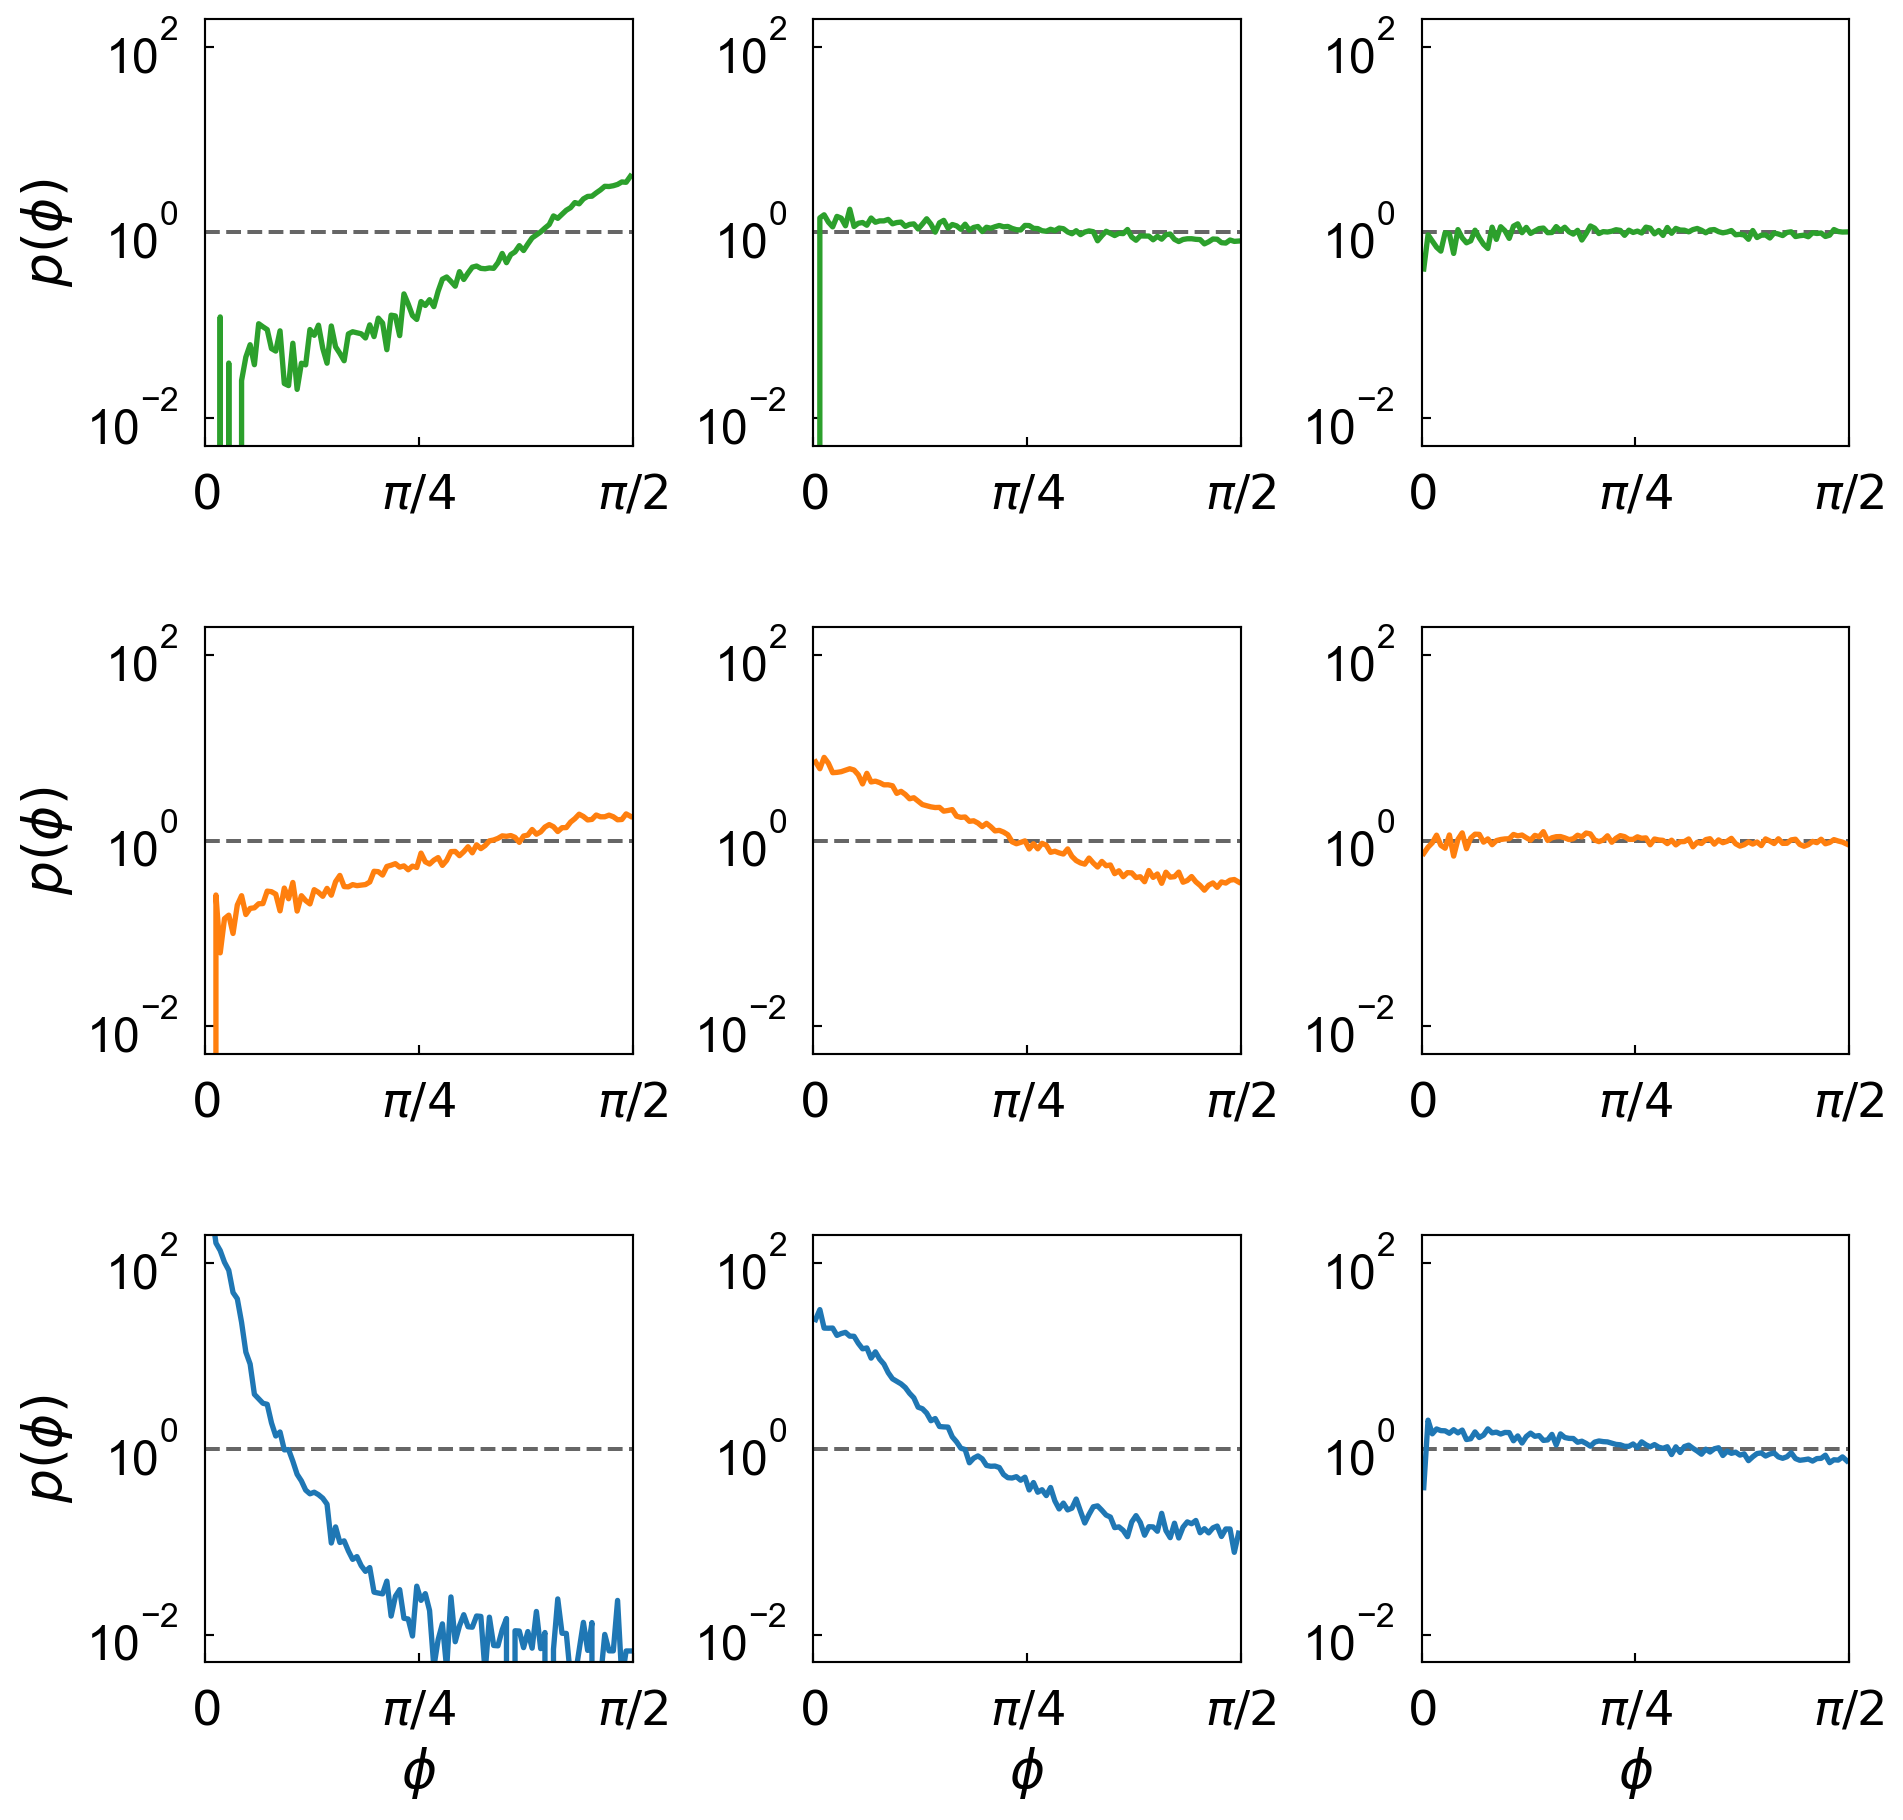

In [9]:
fig = plt.figure(figsize=(10,10),dpi=192)

linestyle = ['-','--',':']
linecolor = ['C0', 'C1', 'C2']
i = 0


for j, sigma_k in enumerate(sigma_k_list):
    for k, kappa in enumerate(kappa_list):
        ax = fig.add_subplot(3, 3, int(7-i+(i%3)*2))
        # print(int(7-i+(i%3)*2))

        i+=1
        filename = './mat/line_{:0.3f}_{:0>3d}.mat'.format(sigma_k,kappa)
        data = loadmat(filename)

        phi = data['phi'][0]

        n_bins = 100
        d_bins = 1/n_bins*np.pi/2
        counts, bins = np.histogram(phi, bins=np.arange(n_bins+1)*d_bins)
        ax.plot([0, np.pi/2],[1,1],'--',color='#666666')
        ax.plot(bins[1:]-d_bins/2,counts/np.sum(counts)/np.sin(bins[1:]-d_bins/2)/d_bins, 
                '-', lw=2, color=linecolor[j])

        ax.set_yscale('log')
        ax.set_xlim([0, np.pi/2])
        ax.set_ylim([1/200, 200])
        ax.set_xticks([0, np.pi/4, np.pi/2])
        ax.set_yticks([1e-2, 1, 1e2])
        ax.set_xticklabels(['$0$', '$\pi/4$', '$\pi/2$'])

        if sigma_k==0:
            ax.set_xlabel('$\phi$',fontsize=20)
        if kappa==256:
            ax.set_ylabel('$p(\phi)$',fontsize=20)
        ax.tick_params(direction='in', axis='both', which='both', labelsize=18, pad=10)
        ax.set_aspect(np.pi/2/(np.log10(200**2))) # x/y

# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()